In [4]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
from scipy.stats import f, norm
import math
%matplotlib inline
import statistics as s

In [5]:
path = 'C:/Users/Tadej/Documents/Magistrska/PCA/TE_process/'
T_Squared, SPE, T_Squared_TH, SPE_TH, FDR_T_Squared, FAR_T_Squared, FDR_SPE, FAR_SPE = [], [], [], [], [], [], [], []
X_names = []

data_train_all = np.genfromtxt(path  + 'd00.csv', delimiter=',').T
no_of_lags = 3
data_train = data_train_all[0:-no_of_lags,:]
for x in range(1, no_of_lags + 1):
    data_train = np.concatenate((data_train, data_train_all[x:data_train_all.shape[0] - no_of_lags + x,:]), axis=1)
X_train = data_train

for i in range(0,22):
    #import files
    name = str(i).zfill(2)
    file = 'd' + name
    data_test_all = np.genfromtxt(path  + file + '_te.csv', delimiter=',')
    data_test = data_test_all[0:-no_of_lags,:]
    for x in range(1, no_of_lags + 1):
        data_test = np.concatenate((data_test, data_test_all[x:data_test_all.shape[0] - no_of_lags + x,:]), axis=1)
    X_test = data_test
    
    X_names.append(name)
    #construct pca model
    no_of_eigenvalues = 17
    PCA = s.PCA_Model(X_train, X_test, no_of_eigenvalues)
    
    #calculate statistics
    T_Squared.append(PCA.calculate_statistics('T_Squared'))
    SPE.append(PCA.calculate_statistics('SPE'))
    
    #calculate thresholds
    alpha = 0.05
    T_Squared_TH.append(PCA.calculate_threshold('T_Squared', 0.01))
    SPE_TH.append(PCA.calculate_threshold('SPE', 0.01))
    
    #validate models
    FDR_T_Squared.append(PCA.validate_model('T_Squared', 'fdr'))
    FAR_T_Squared.append(PCA.validate_model('T_Squared', 'far'))
    FDR_SPE.append(PCA.validate_model('SPE', 'fdr'))
    FAR_SPE.append(PCA.validate_model('SPE', 'far'))

In [6]:
#print FDR validations for T_Squared
[print('Delež odkritih napak za', x[1], 'z Hotelling statistiko:', "{0:.2f}".format(x[0]*100), '%') for x in zip(FDR_T_Squared, X_names) if x[1] != '00'];

Delež odkritih napak za 01 z Hotelling statistiko: 99.62 %
Delež odkritih napak za 02 z Hotelling statistiko: 98.49 %
Delež odkritih napak za 03 z Hotelling statistiko: 1.88 %
Delež odkritih napak za 04 z Hotelling statistiko: 3.76 %
Delež odkritih napak za 05 z Hotelling statistiko: 24.09 %
Delež odkritih napak za 06 z Hotelling statistiko: 99.25 %
Delež odkritih napak za 07 z Hotelling statistiko: 51.07 %
Delež odkritih napak za 08 z Hotelling statistiko: 97.49 %
Delež odkritih napak za 09 z Hotelling statistiko: 0.75 %
Delež odkritih napak za 10 z Hotelling statistiko: 40.28 %
Delež odkritih napak za 11 z Hotelling statistiko: 18.44 %
Delež odkritih napak za 12 z Hotelling statistiko: 99.37 %
Delež odkritih napak za 13 z Hotelling statistiko: 94.35 %
Delež odkritih napak za 14 z Hotelling statistiko: 92.85 %
Delež odkritih napak za 15 z Hotelling statistiko: 5.77 %
Delež odkritih napak za 16 z Hotelling statistiko: 23.09 %
Delež odkritih napak za 17 z Hotelling statistiko: 75.28 %
D

In [7]:
#print FAR validations for T_Squared
[print('Delež lažnih alarmov za', x[1], 'z Hotelling statistiko:', "{0:.2f}".format(x[0]*100), '%') for x in zip(FAR_T_Squared, X_names)];

Delež lažnih alarmov za 00 z Hotelling statistiko: 0.62 %
Delež lažnih alarmov za 01 z Hotelling statistiko: 0.00 %
Delež lažnih alarmov za 02 z Hotelling statistiko: 1.25 %
Delež lažnih alarmov za 03 z Hotelling statistiko: 0.00 %
Delež lažnih alarmov za 04 z Hotelling statistiko: 0.62 %
Delež lažnih alarmov za 05 z Hotelling statistiko: 1.25 %
Delež lažnih alarmov za 06 z Hotelling statistiko: 0.00 %
Delež lažnih alarmov za 07 z Hotelling statistiko: 1.25 %
Delež lažnih alarmov za 08 z Hotelling statistiko: 0.00 %
Delež lažnih alarmov za 09 z Hotelling statistiko: 3.75 %
Delež lažnih alarmov za 10 z Hotelling statistiko: 0.00 %
Delež lažnih alarmov za 11 z Hotelling statistiko: 0.00 %
Delež lažnih alarmov za 12 z Hotelling statistiko: 0.00 %
Delež lažnih alarmov za 13 z Hotelling statistiko: 0.00 %
Delež lažnih alarmov za 14 z Hotelling statistiko: 1.25 %
Delež lažnih alarmov za 15 z Hotelling statistiko: 0.00 %
Delež lažnih alarmov za 16 z Hotelling statistiko: 9.38 %
Delež lažnih a

In [8]:
#print FDR validations for SPE
[print('Delež odkritih napak za', x[1], 'z Q statistiko:', "{0:.2f}".format(x[0]*100), '%') for x in zip(FDR_SPE, X_names) if x[1] != '00'];

Delež odkritih napak za 01 z Q statistiko: 100.00 %
Delež odkritih napak za 02 z Q statistiko: 99.62 %
Delež odkritih napak za 03 z Q statistiko: 18.57 %
Delež odkritih napak za 04 z Q statistiko: 100.00 %
Delež odkritih napak za 05 z Q statistiko: 46.80 %
Delež odkritih napak za 06 z Q statistiko: 100.00 %
Delež odkritih napak za 07 z Q statistiko: 100.00 %
Delež odkritih napak za 08 z Q statistiko: 98.49 %
Delež odkritih napak za 09 z Q statistiko: 17.94 %
Delež odkritih napak za 10 z Q statistiko: 75.16 %
Delež odkritih napak za 11 z Q statistiko: 91.47 %
Delež odkritih napak za 12 z Q statistiko: 99.75 %
Delež odkritih napak za 13 z Q statistiko: 95.98 %
Delež odkritih napak za 14 z Q statistiko: 100.00 %
Delež odkritih napak za 15 z Q statistiko: 19.82 %
Delež odkritih napak za 16 z Q statistiko: 64.37 %
Delež odkritih napak za 17 z Q statistiko: 97.62 %
Delež odkritih napak za 18 z Q statistiko: 92.35 %
Delež odkritih napak za 19 z Q statistiko: 80.80 %
Delež odkritih napak za 20

In [9]:
#print FAR validations for SPE
[print('Delež lažnih alarmov za', x[1], 'z Q statistiko:', "{0:.2f}".format(x[0]*100), '%') for x in zip(FAR_SPE, X_names)];

Delež lažnih alarmov za 00 z Q statistiko: 13.12 %
Delež lažnih alarmov za 01 z Q statistiko: 13.75 %
Delež lažnih alarmov za 02 z Q statistiko: 11.25 %
Delež lažnih alarmov za 03 z Q statistiko: 19.38 %
Delež lažnih alarmov za 04 z Q statistiko: 13.12 %
Delež lažnih alarmov za 05 z Q statistiko: 13.12 %
Delež lažnih alarmov za 06 z Q statistiko: 4.38 %
Delež lažnih alarmov za 07 z Q statistiko: 10.00 %
Delež lažnih alarmov za 08 z Q statistiko: 7.50 %
Delež lažnih alarmov za 09 z Q statistiko: 18.12 %
Delež lažnih alarmov za 10 z Q statistiko: 8.12 %
Delež lažnih alarmov za 11 z Q statistiko: 14.37 %
Delež lažnih alarmov za 12 z Q statistiko: 8.75 %
Delež lažnih alarmov za 13 z Q statistiko: 2.50 %
Delež lažnih alarmov za 14 z Q statistiko: 14.37 %
Delež lažnih alarmov za 15 z Q statistiko: 11.25 %
Delež lažnih alarmov za 16 z Q statistiko: 21.25 %
Delež lažnih alarmov za 17 z Q statistiko: 11.88 %
Delež lažnih alarmov za 18 z Q statistiko: 14.37 %
Delež lažnih alarmov za 19 z Q stati

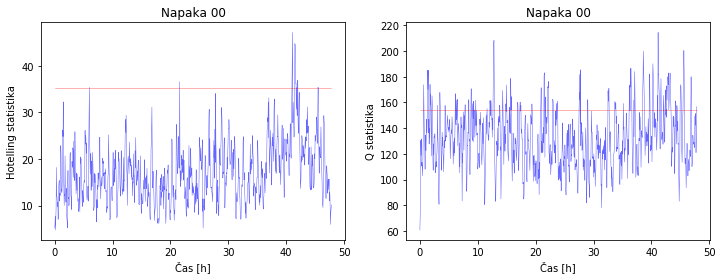

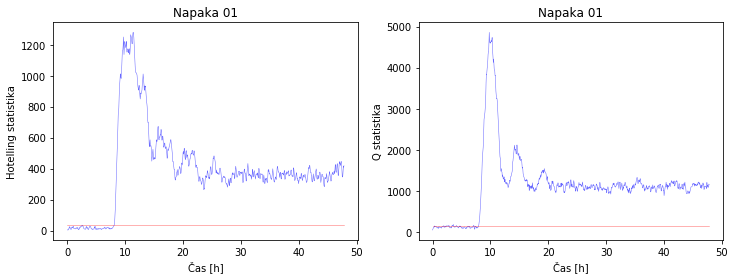

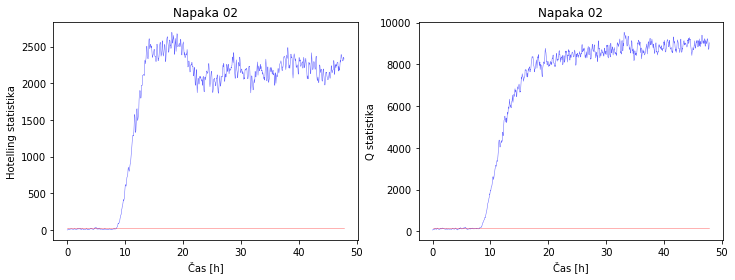

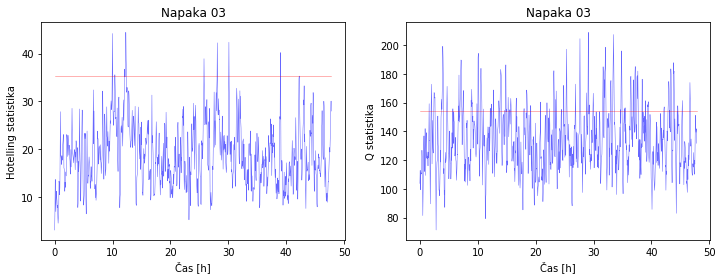

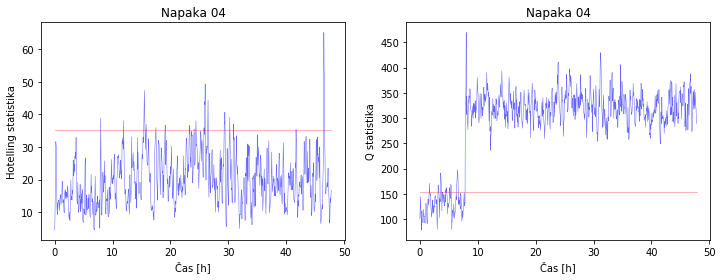

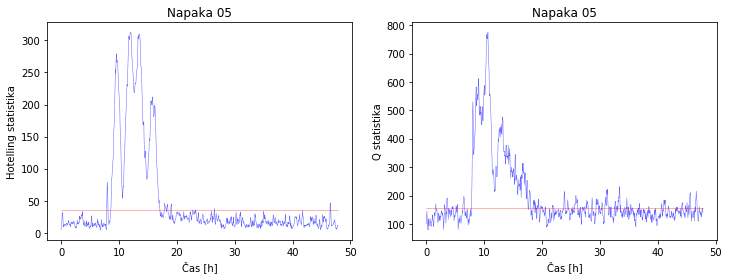

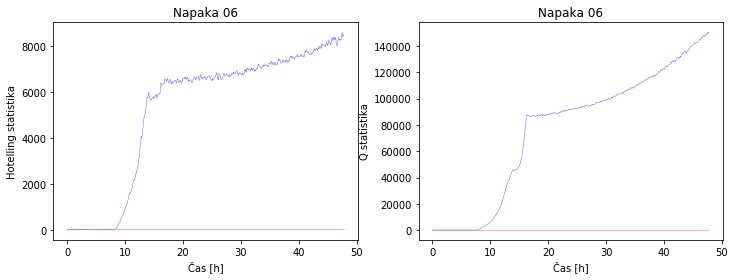

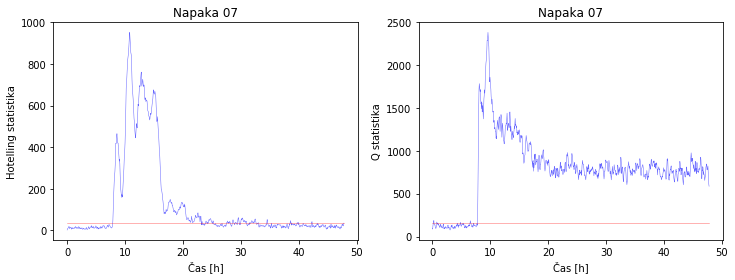

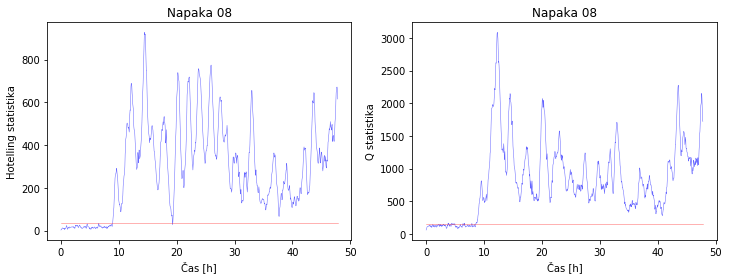

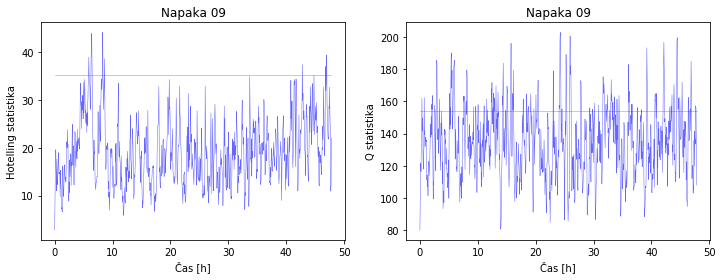

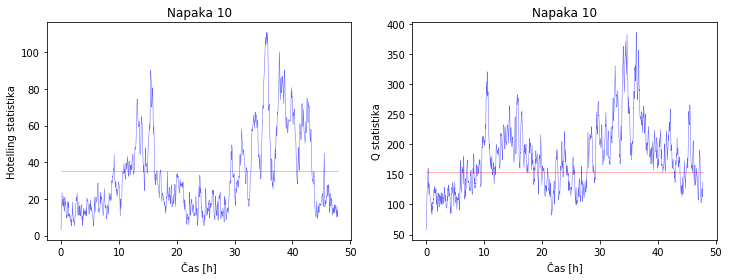

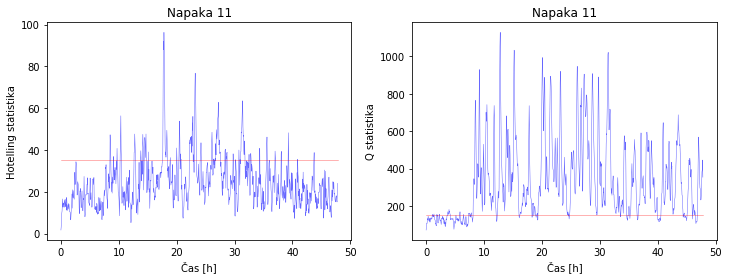

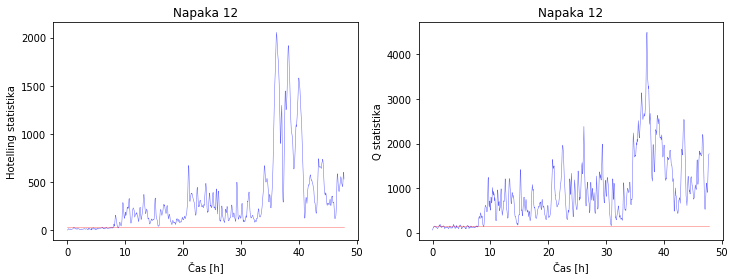

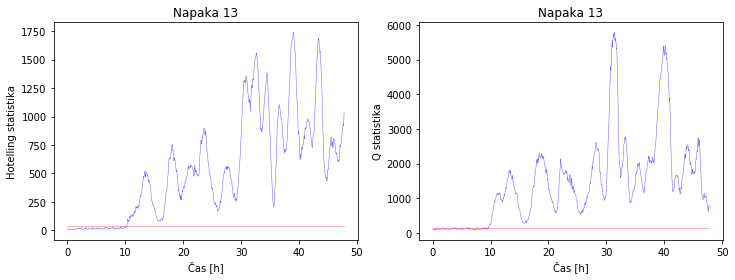

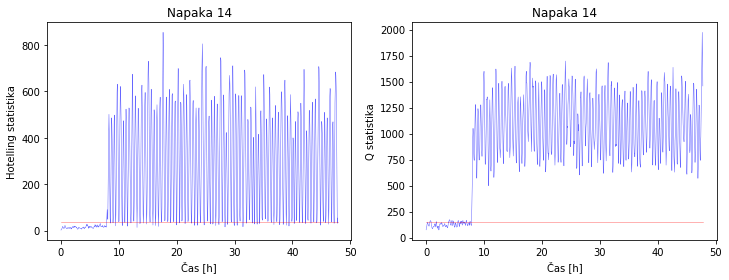

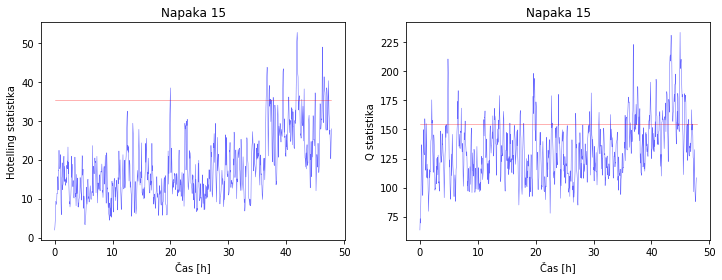

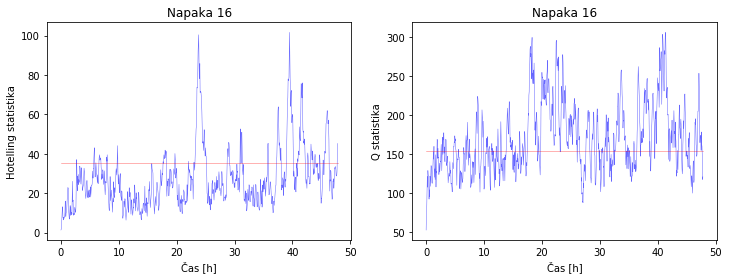

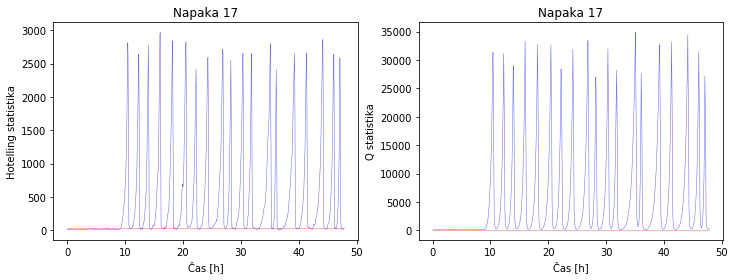

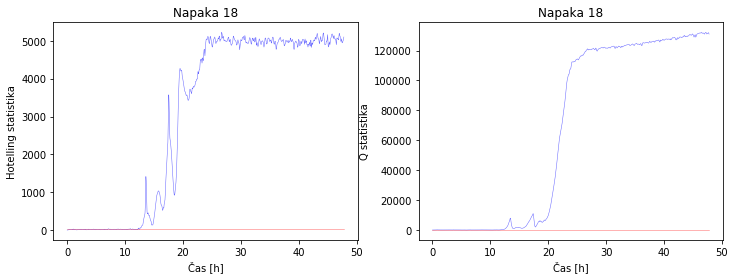

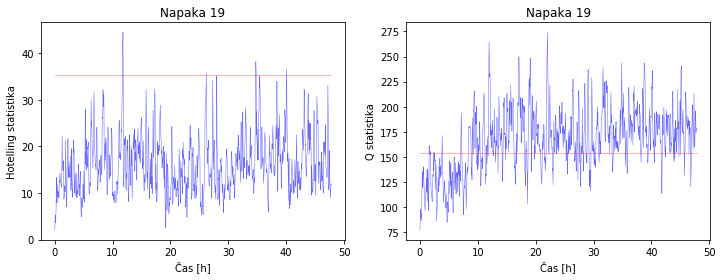

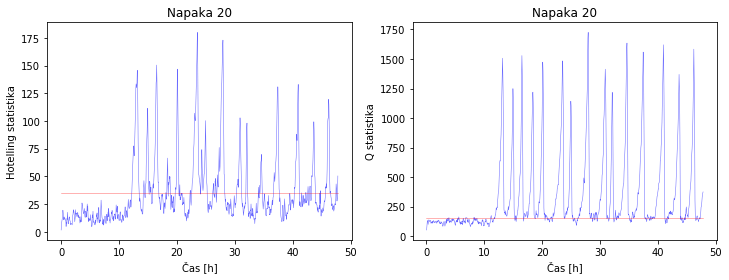

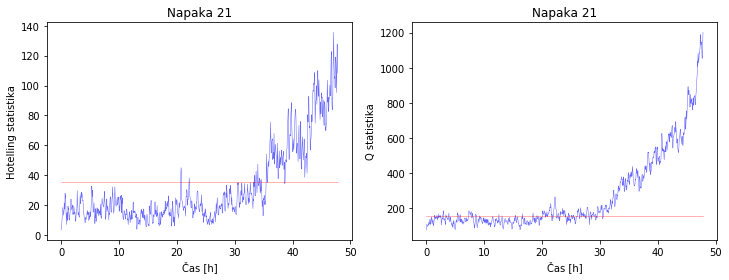

In [10]:
#Plot test statistics
for i in range(0,22):
    time_vec = [x*3/60 for x in range(0,len(T_Squared[i]))]
    fig, ax = plt.subplots(1, 2, figsize=(12,4))
    
    #Plot Hotelling statistics
    ax[0].plot(time_vec, T_Squared[i], 'b-', lw=0.5, alpha=0.6)
    ax[0].plot(time_vec, [T_Squared_TH[i]]*len(T_Squared[i]), 'r-', lw=0.5, alpha=0.6)
    ax[0].set_xlabel('Čas [h]')
    ax[0].set_ylabel('Hotelling statistika')
    ax[0].set_title('Napaka ' + X_names[i])
        
    #Plot Q statistics
    ax[1].plot(time_vec, SPE[i], 'b-', lw=0.5, alpha=0.6)
    ax[1].plot(time_vec, [SPE_TH[i]]*len(SPE[i]), 'r-', lw=0.5, alpha=0.6)
    ax[1].set_xlabel('Čas [h]')
    ax[1].set_ylabel('Q statistika')
    ax[1].set_title('Napaka ' + X_names[i])